In [11]:
#pip install neo4j


In [23]:
from neo4j import GraphDatabase
uri = "bolt://3.231.19.55:7687"  
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [24]:
cypher_query = '''
MATCH (n)
RETURN COUNT(n) AS count
LIMIT $limit
'''

with driver.session(database="neo4j") as session:
    results = session.read_transaction(
        lambda tx: tx.run(cypher_query, limit=10).data())  # Pass limit as an integer, not a string
    for record in results:
        print(record['count'])

driver.close()


/tmp/ipykernel_10206/2097300615.py:8: DeprecationWarning: read_transaction has been renamed to execute_read
  results = session.read_transaction(


0


In [26]:
import json


with open('output.json', 'r') as json_file:
    data = json.load(json_file)
if isinstance(data, list) and len(data) == 2 and isinstance(data[1], dict) and "relationships" in data[1]:
    for relationship in data[1]["relationships"]:
        print("Source:", relationship["source"])
        print("Target:", relationship["target"])
        print("Label:", relationship["label"])
        print()
else:
    print("Invalid or unexpected JSON file structure.")


Source: pet contract respiratory illness
Target: common cold
Label: specifically caused by

Source: common cold
Target: human rhinovirus
Label: caused by

Source: pet contract respiratory illness
Target: transmissible animal
Label: transmissible to

Source: transmissible animal
Target: cat
Label: includes

Source: transmissible animal
Target: dog
Label: includes

Source: transmissible animal
Target: domestic pet
Label: includes

Source: respiratory intestinal infection
Target: animal
Label: caused by

Source: respiratory intestinal infection
Target: canine feline coronaviruses
Label: caused by

Source: respiratory intestinal infection
Target: strain
Label: caused by

Source: COVID-19
Target: human coronavirus
Label: caused by

Source: COVID-19
Target: direct transmission
Label: caused by

Source: direct transmission
Target: human
Label: from

Source: direct transmission
Target: pet
Label: to

Source: good hygiene practice
Target: interact animal
Label: crucial for

Source: good hygiene

## Insering the Nodes and Edges to the graph 

In [37]:
#this function will take the source, targe and label, to perfrom the insertions
def insert_nodes_and_relationships(source, target, label):
    create_node_query = "CREATE (n:Node {id: $id, label: $label})"
    create_relationship_query = "MATCH (source:Node {id: $source_id}), (target:Node {id: $target_id}) " \
                                "CREATE (source)-[:RELATIONSHIP {label: $label}]->(target)"
    try:
        with driver.session() as session:
            # Create source node with label
            session.run(create_node_query, id=source, label=label)

            # Create target node with label
            session.run(create_node_query, id=target, label=label)

            # Create relationship
            session.run(create_relationship_query, source_id=source, target_id=target, label=label)

        print("Nodes and relationship inserted successfully.")
    except Exception as e:
        print(f"Error during insertion: {e}")


In [38]:
def adding_neo4j_graph():
    with open('output.json', 'r') as json_file:
        data = json.load(json_file)

    if isinstance(data, list) and len(data) == 2 and isinstance(data[1], dict) and "relationships" in data[1]:
        for relationship in data[1]["relationships"]:
            insert_nodes_and_relationships(relationship["source"],relationship["source"],relationship["label"])
    else:
        print("Invalid or unexpected JSON file structure.")


In [43]:
uri = "bolt://3.231.19.55:7687"  
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))
adding_neo4j_graph()
driver.close()

Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.


Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.


In [22]:
!pip install py2neo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 1.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


## Importing and Visualizing 

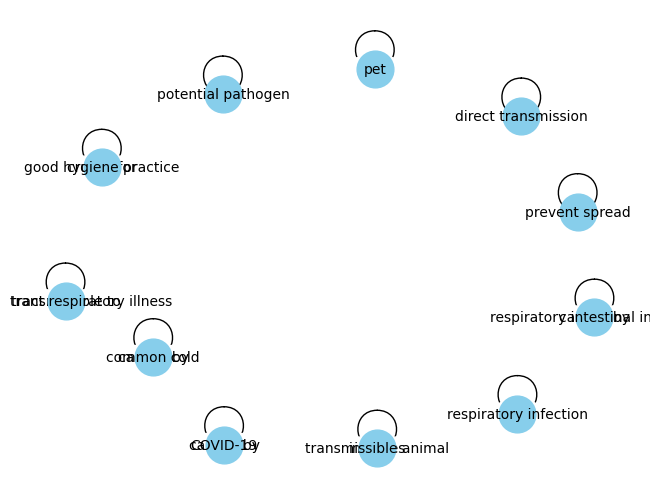

In [48]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph


uri = "bolt://3.231.19.55:7687"  
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))

def retrieve_graph_data():
    graph = nx.Graph()
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session(database="neo4j") as session:
        result = session.run("MATCH (n)-[r]->(m) RETURN n, r, m")
        for record in result:
            source = record["n"]
            target = record["m"]
            relation = record["r"]
            
            graph.add_node(source["id"], label=source["label"])
            graph.add_node(target["id"], label=target["label"])
            graph.add_edge(source["id"], target["id"], label=relation["label"])

    return graph

def visualize_graph(graph, edge_length=1.0):
    pos = nx.spring_layout(graph, k=edge_length) 
    labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

graph_data = retrieve_graph_data()
visualize_graph(graph_data,edge_length=5)
driver.close()


## Deleting Everything in DataBase

In [41]:
from neo4j import GraphDatabase


uri = "bolt://3.231.19.55:7687"  
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to delete nodes and relationships
def delete_nodes_and_relationships():
    with driver.session() as session:
          session.run("MATCH (n) DETACH DELETE n")

# Call the function to delete everything
delete_nodes_and_relationships()
driver.close()


In [45]:
driver.close()